**[LeetCode Link](https://leetcode-cn.com/problems/kth-smallest-element-in-a-sorted-matrix/solution/you-xu-ju-zhen-zhong-di-kxiao-de-yuan-su-by-leetco/472018/)**

## 归并排序
### 思路及算法
* 由题目给出的性质可知，这个矩阵的每一行均为一个有序数组。问题即转化为从这 $n$ 个有序数组中找第 $k$ 大的数，可以想到利用归并排序的做法，归并到第 $k$ 个数即可停止。
* 一般归并排序是两个数组归并，而本题是 $n$ 个数组归并，所以需要用小根堆维护，以优化时间复杂度。

### 复杂度分析
* 时间复杂度：$\mathcal{O}(k\log{n})$，归并 $k$ 次，每次堆中插入和弹出的操作时间复杂度均为 $\mathcal{\log{n}}$。
* 空间复杂度：$\mathcal{O}(n)$，堆的大小始终为 $n$。

> 需要注意的是，$k$ 在最坏情况下是 $n^2$ ，因此该解法最坏时间复杂度为 $\mathcal{O}(n^2\log{n})$。

In [ ]:
class Solution:
    def kthSmallest(self, matrix: List[List[int]], k: int) -> int:
        n = len(matrix)
        pq = [(matrix[i][0], i, 0) for i in range(n)]
        heapq.heapify(pq)

        ret = 0
        for i in range(k - 1):
            num, x, y = heapq.heappop(pq)
            if y != n - 1:
                heapq.heappush(pq, (matrix[x][y + 1], x, y + 1))
        
        return heapq.heappop(pq)[0]

## 二分查找
### 思路及算法
由题目给出的性质可知，这个矩阵内的元素是从左上到右下递增的（假设矩阵左上角为 $matrix[0][0]$）。以下图为例：
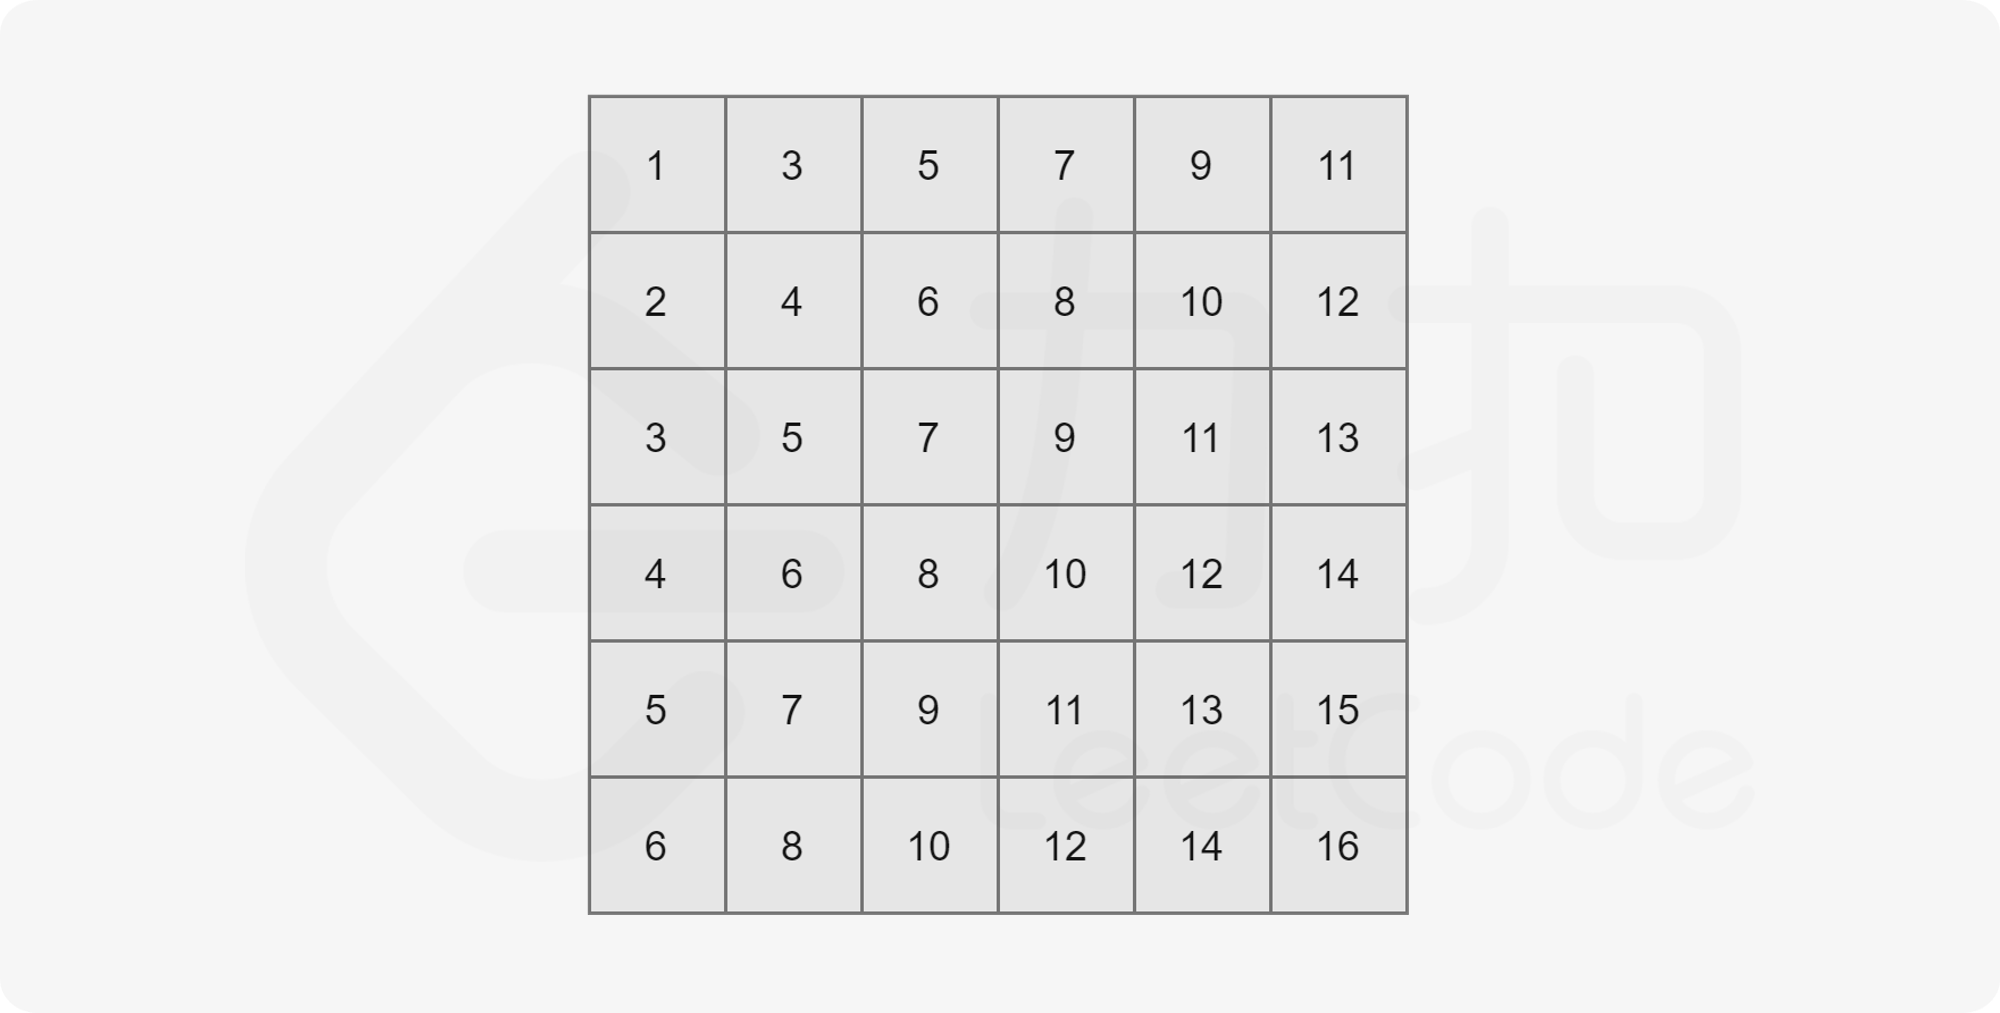
我们知道整个二维数组中 $matrix[0][0]$ 为最小值，$matrix[n - 1][n - 1]$ 为最大值，现在我们将其分别记作 $l$ 和 $r$。
可以发现一个性质：任取一个数 $mid$ 满足 $l\leq mid \leq r$，那么矩阵中不大于 $mid$ 的数，肯定全部分布在矩阵的左上角。
例如下图，取 $mid=8$：
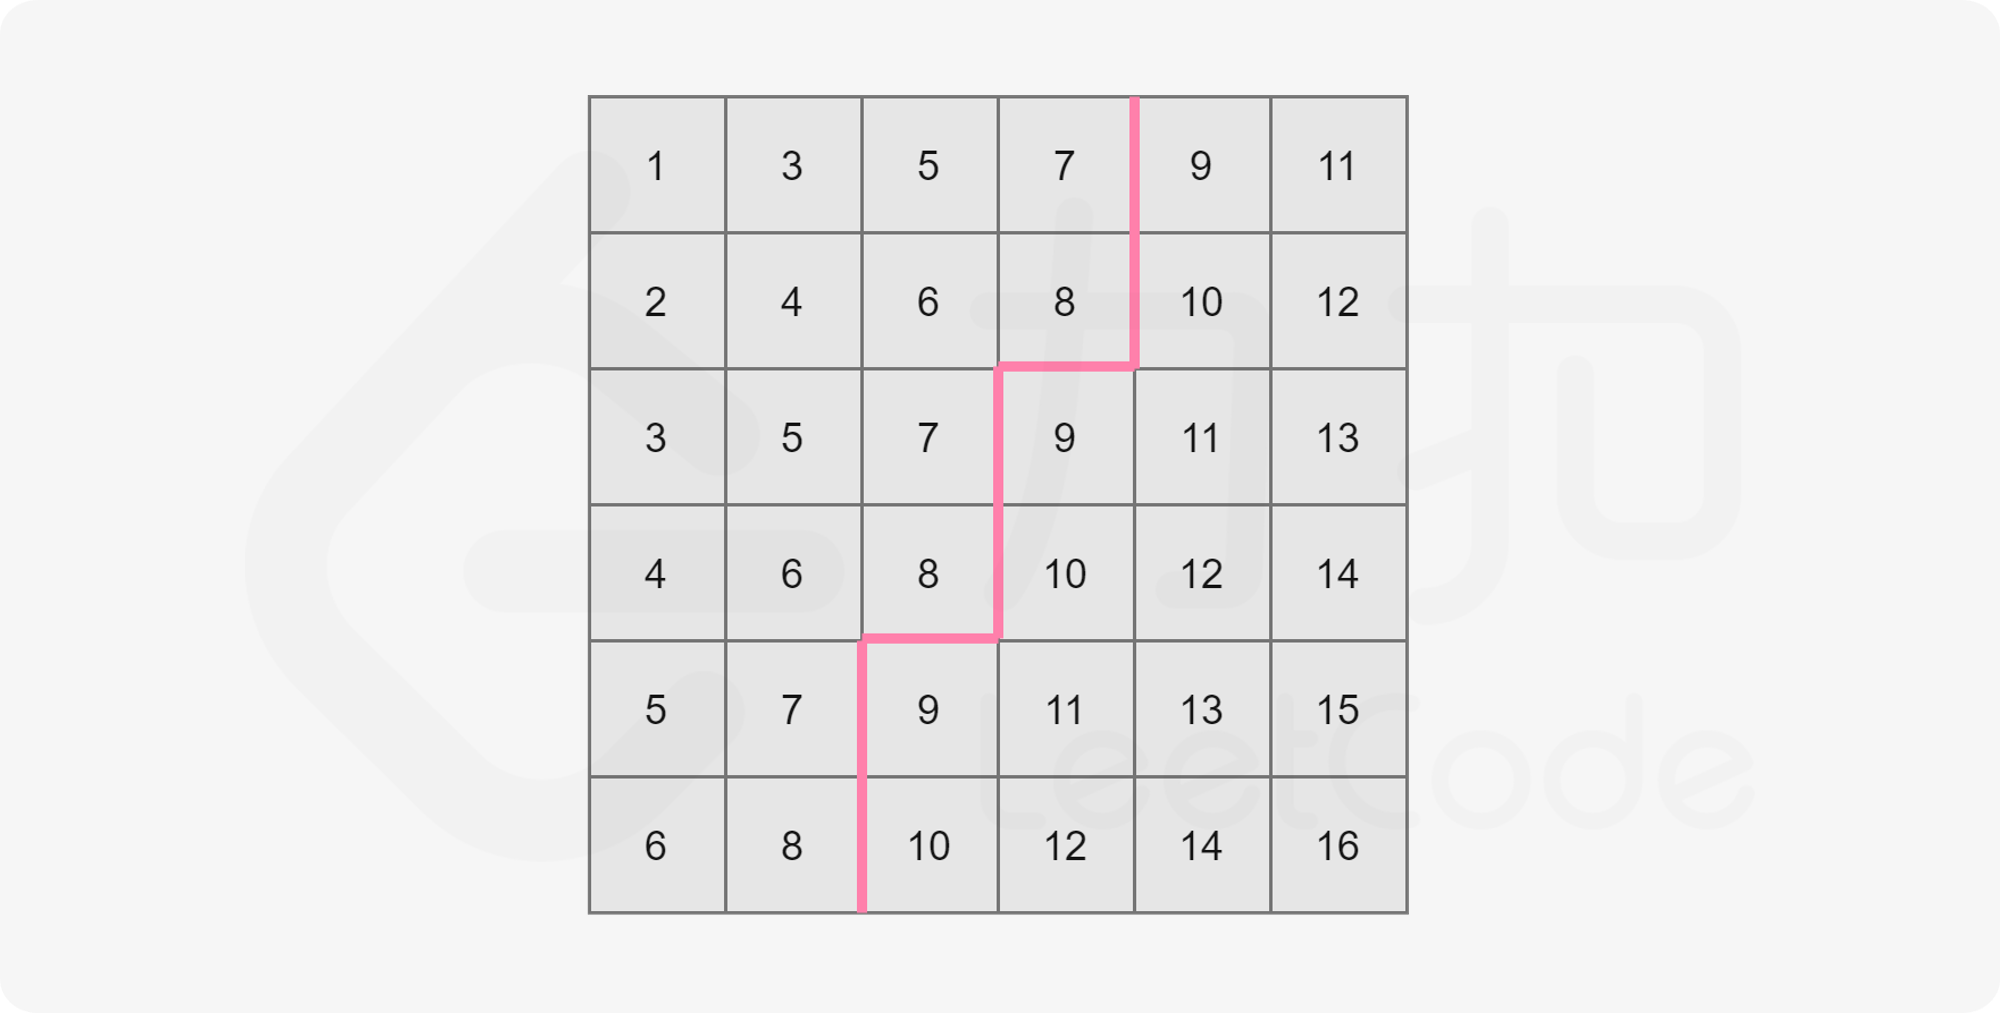
我们可以看到，矩阵中大于 $mid$ 的数就和不大于 $mid$ 的数分别形成了两个板块，沿着一条锯齿线将这个矩形分开。其中左上角板块的大小即为矩阵中不大于 $mid$ 的数的数量。

我们只要沿着这条锯齿线走一遍即可计算出这两个板块的大小，也自然就统计出了这个矩阵中不大于 $mid$ 的数的个数了。

走法演示如下，依然取 $mid=8$：
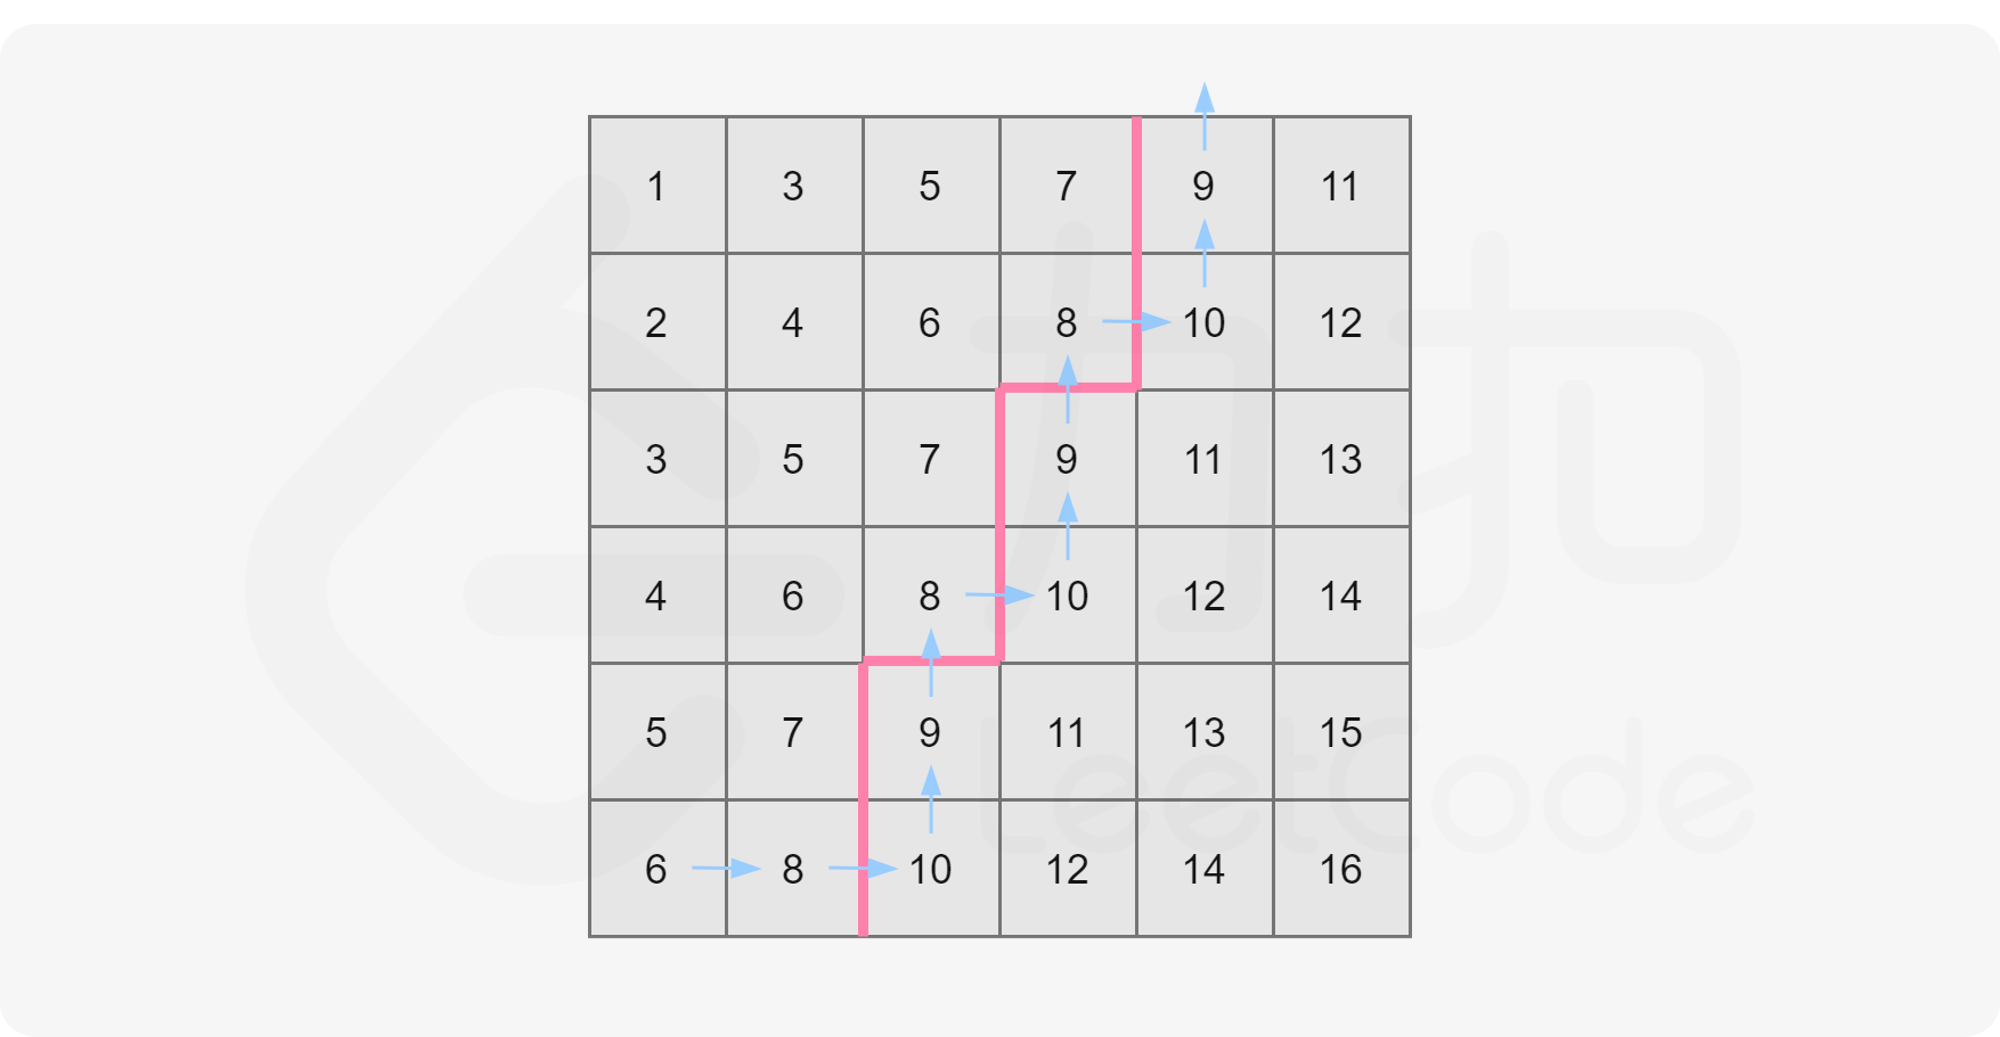

可以这样描述走法：
* 初始位置在 $matrix[n - 1][0]$（即左下角）；
* 设当前位置为 $matrix[i][j]$。若 $matrix[i][j] \leq mid$，则将当前所在列的不大于 $mid$ 的数的数量（即 $i + 1$）累加到答案中，并向右移动，否则向上移动；
* 不断移动直到走出格子为止。

我们发现这样的走法时间复杂度为 $O(n)$，即我们可以线性计算对于任意一个 $mid$，矩阵中有多少数不大于它。这满足了二分查找的性质。

不妨假设答案为 $x$，那么可以知道 $l\leq x\leq r$，这样就确定了二分查找的上下界。

每次对于「猜测」的答案 $mid$，计算矩阵中有多少数不大于 $mid$ ：

* 如果数量不少于 $k$，那么说明最终答案 $x$ 不大于 $mid$；
* 如果数量少于 $k$，那么说明最终答案 $x$ 大于 $mid$。

这样我们就可以计算出最终的结果 $x$ 了。

### 复杂度分析
时间复杂度：$O(n\log(r-l))$，二分查找进行次数为 $O(\log(r-l))$，每次操作时间复杂度为 $O(n)$。
空间复杂度：$O(1)$。

In [ ]:
class Solution:
    def kthSmallest(self, matrix: List[List[int]], k: int) -> int:
        n = len(matrix)

        def check(mid):
            i, j = n - 1, 0
            num = 0
            while i >= 0 and j < n:
                if matrix[i][j] <= mid:
                    num += i + 1
                    j += 1
                else:
                    i -= 1
            return num >= k

        left, right = matrix[0][0], matrix[-1][-1]
        while left < right:
            mid = (left + right) // 2
            if check(mid):
                right = mid
            else:
                left = mid + 1
        
        return left

**[Comment](https://leetcode-cn.com/problems/kth-smallest-element-in-a-sorted-matrix/solution/you-xu-ju-zhen-zhong-di-kxiao-de-yuan-su-by-leetco/472018/)**

关于二分查找返回的left一定在矩阵中这个问题, 写一点个人的理解.

我们先看check函数.check函数的目的是统计矩阵里小等于mid的元素数目count. 再判断count和k的关系.因为mid = (l + r) / 2这种划分方法是把矩阵划分成了[left , mid] 与[mid + 1, right]两部分. 当 count < k 时, 说明mid太小了, 我们应该在[mid + 1, right] 这个范围里查找. 否则在[left, mid]范围里查找.

如果存在一个不在矩阵中的数a满足条件, 因为a不在矩阵中,那count统计的元素肯定都是小于a的, 那一定存在一个比a小且在矩阵中的数b满足条件,即从小于a的数变成了小于等于b的数 .等用题目中的例子,x = 13 和x = 14 都满足小于等于x的元素数目等于8, 对14来说统计的都是小于它的数, 而对13来说统计的都是小于等于它的数. 问题来了, 那为何取到的不是14而是13呢?

因为我们取mid的取法是 mid = (left + right) / 2, 当left < right时, mid 永远 取不到right, 想要mid取到right ,只有left == right. 但循环条件是 while(left < right),当 left == right时循环已经终止. 所以我们得到会是一个左边界. 还是用题目中的例子, 假设left = 13, right = 14 则 mid = (13 + 14) / 2 = 13